# **AI Career Advisor**: A Predictive Model for Career Path Selection.

## **Description**

This project will leverage machine learning to guide individuals in discovering career paths aligned with their personalities, interests, and work preferences. By analyzing a range of factors, the model aims to provide tailored career recommendations for individuals just starting out, and professionals seeking a career transition.

## **Initial Road Map**

#### **Define the Problem:**

The aim of this project is to predict or recommend career paths based on certain criteria; this requires taking into consideration some factors that could influence individual career decisions, such as:

* Personality traits
* Interests or hobbies
* Skills or strengths
* Educational background
* Work-life balance preferences

**Data Collection:**

* Conduct a survey to gather my own data.

**Feature Selection:**

* Identify which features (e.g., personality type, education level, interest areas) will be used to train the model.

**Modeling:**

* Classification algorithms to predict the suitable career. For example :Random Forest or Decision Trees, since they handle categorical data well.

* XGBoost or LightGBM.

* Recommendation systems or clustering techniques. (For a broader range of careers)

**Evaluation:**

* Test model to see how well it predicts a career based on a test set of data. Using metrics like accuracy, F1 Score, precision, and recall.

**Interface/User Interaction:**

* Create a simple web or app interface where users input their details, and the model returns career suggestions.
* Use Flask (Python) or other frameworks like Streamlit.

**Resources:**

Libraries: 

* pandas scikit-learn
* XGBoost for data processing and modeling.



### **Data Preprocessing**

In [614]:
import pandas as pd

# Load dataset
df = pd.read_csv('Career Path Survey.csv')

In [615]:
df.head()

,Timestamp,What is your gender?,What is your current employment status?,How many years of professional work experience do you have?,What is your highest level of education?,What is your age?,What is the main reason you are looking to transition into a new career?,"Other, pls specify",What field(s) are you considering for your career transition?,What challenges do you anticipate in making this transition?,"Other, please specify",What is your current job title or industry (if applicable)?,"How satisfied are you with your current career?\n(On a scale of 1 to 5, where 1 = not satisfied and 5 = highly satisfied)",What is your primary motivation for changing careers or choosing a career path?,"Other, please specify .1",What type of career do you aspire to have in the future?,Which technical skills do you have? (Select all that apply),"Other, pls specify",Which soft skills do you possess? (Select all that apply),"Other, please specify .2",Do you have any professional certifications or licenses?,"If Yes, please specify",How do you usually spend your free time?,How do you prefer to recharge after a long day?,"In large social gatherings, do you typically feel",How would you describe yourself in conversations?,Which type of work environment do you prefer?,Do you prefer working in,How do you handle uncertainty or change in the workplace?,What is your ideal work-life balance?
0,9/29/2024 12:08:43,Female,"Unemployed, looking for work",4-7 years,Professional certifications,45-54,Seeking higher income or more security,The water,Tech,Difficulty finding opportunities,The water,Transcriptionist,3.0,Financial reasons,Thejswj kkakka,Better,Other,Transcribing and editing,"Problem solving, Time management",NaN,Yes,TRCN,Spending time alone or in quiet reflection,NaN,Spending time alone or in quiet reflection,I mostly listen and speak when necessary,"Flexible, dynamic, and open-ended","Independent, solo work",I adapt quickly and enjoy new challenges,Balanced between work and personal time
1,9/29/2024 15:04:09,Female,Employed full-time,1-3 years,Master’s degree,25-34,NaN,NaN,NaN,NaN,NaN,Education,3.0,More fulfilling work,Sciences,Tech,Sales,NaN,"Communication, Teamwork, Problem solving, Time...",Entrepreneur,No,NaN,Socializing with friends or attending events,Spending time alone or in quiet reflection,Energized and excited by the group,I mostly listen and speak when necessary,"Flexible, dynamic, and open-ended",Team settings with collaboration,I adapt quickly and enjoy new challenges,Balanced between work and personal time
2,9/29/2024 15:16:10,Female,"Unemployed, looking for work",10+ years,Master’s degree,35-44,Seeking higher income or more security,Financial instability during the transition,Academics,Difficulty finding opportunities,Looking for other work balance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9/29/2024 16:43:13,Female,Employed full-time,4-7 years,Bachelor’s degree,25-34,NaN,NaN,NaN,NaN,NaN,Animal House Scientist,4.0,Career growth or promotion,Nil,Lecturing,Other,Nil,"Leadership, Time management",Nil,Yes,Yes,Spending time alone or with one or two close f...,Being with people or engaging in social activi...,Overwhelmed and prefer smaller groups,I often start conversations and talk a lot,"Structured, organized, and predictable",Team settings with collaboration,I adapt quickly and enjoy new challenges,Balanced between work and personal time
4,9/29/2024 19:19:23,Male,Employed full-time,10+ years,Master’s degree,45-54,Personal growth or a new challenge,New challenge and decision making,Executive Management,Difficulty finding opportunities,Don’t desire to leave the shore of the country...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [616]:
# Preprocess dataset
# Drop redundant columns
df.drop(columns=['Timestamp'], inplace=True)

In [426]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 29 columns):
 #   Column                                                                                                                    Non-Null Count  Dtype  
---  ------                                                                                                                    --------------  -----  
 0   What is your gender?                                                                                                      83 non-null     object 
 1   What is your current employment status?                                                                                   83 non-null     object 
 2   How many years of professional work experience do you have?                                                               65 non-null     object 
 3   What is your highest level of education?                                                                                  83 non-null    

In [427]:
df.duplicated().sum()

0

In [617]:
#Remove whitespaces
df.columns = df.columns.str.strip()

In [618]:
# Dropping specific columns by name
df.drop(columns=['Other, please specify .1','Other, please specify .2', 'Other, pls specify'], inplace=True)


In [430]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 25 columns):
 #   Column                                                                                                                    Non-Null Count  Dtype  
---  ------                                                                                                                    --------------  -----  
 0   What is your gender?                                                                                                      83 non-null     object 
 1   What is your current employment status?                                                                                   83 non-null     object 
 2   How many years of professional work experience do you have?                                                               65 non-null     object 
 3   What is your highest level of education?                                                                                  83 non-null    

In [619]:
#Create new column labels 

# Define a dictionary with old column names as keys and new column names as values
new_column_names = {
    'What is your gender?': 'gender',
    'What is your current employment status?': 'employment_status',
    'How many years of professional work experience do you have?': 'work_experience',
    'What is your highest level of education?': 'education_level',
    'What is your age?': 'age',
    'What is the main reason you are looking to transition into a new career?': 'transition_reason',
    'What field(s) are you considering for your career transition?': 'transition_career',
    'What challenges do you anticipate in making this transition?': 'transition_challenge',
    'Other, please specify': 'challenges_other',
    'What is your current job title or industry (if applicable)?': 'current_job_title',
    'How satisfied are you with your current career?\n(On a scale of 1 to 5, where 1 = not satisfied and 5 = highly satisfied)': 'career_satisfaction',
    'What is your primary motivation for changing careers or choosing a career path?': 'primary_motivation',
    'What type of career do you aspire to have in the future?': 'aspired_job',
    'Which technical skills do you have? (Select all that apply)': 'technical_skills',
    'Other, pls specify ': 'technical_skills_other',
    'Which soft skills do you possess? (Select all that apply)': 'soft_skills',
    'Do you have any professional certifications or licenses?': 'has_certifications',
    'If Yes, please specify': 'certification',
    'How do you usually spend your free time?': 'free_time_activity',
    'How do you prefer to recharge after a long day?': 'recharge_preference',
    'In large social gatherings, do you typically feel': 'social_gathering_feelings',
    'How would you describe yourself in conversations?': 'conversation_style',
    'Which type of work environment do you prefer?': 'work_environment',
    'Do you prefer working in': 'work_style',
    'How do you handle uncertainty or change in the workplace?': 'uncertainty_handling',
    'What is your ideal work-life balance?': 'work_life_balance'
}

# Rename the columns
df.rename(columns=new_column_names, inplace=True)

In [620]:
pd.set_option('display.max_columns', None)

In [621]:
df.head(1)

,gender,employment_status,work_experience,education_level,age,transition_reason,transition_career,transition_challenge,challenges_other,current_job_title,career_satisfaction,primary_motivation,aspired_job,technical_skills,soft_skills,has_certifications,certification,free_time_activity,recharge_preference,social_gathering_feelings,conversation_style,work_environment,work_style,uncertainty_handling,work_life_balance
0,Female,"Unemployed, looking for work",4-7 years,Professional certifications,45-54,Seeking higher income or more security,Tech,Difficulty finding opportunities,The water,Transcriptionist,3.0,Financial reasons,Better,Other,"Problem solving, Time management",Yes,TRCN,Spending time alone or in quiet reflection,NaN,Spending time alone or in quiet reflection,I mostly listen and speak when necessary,"Flexible, dynamic, and open-ended","Independent, solo work",I adapt quickly and enjoy new challenges,Balanced between work and personal time


#### Handling Missing Values

In [434]:
df.isnull().sum()

gender                        0
employment_status             0
work_experience              18
education_level               0
age                           0
transition_reason            34
transition_career            41
transition_challenge         36
challenges_other             74
current_job_title            20
career_satisfaction          18
primary_motivation           18
aspired_job                  18
technical_skills              8
soft_skills                   8
has_certifications            8
certification                52
free_time_activity           18
recharge_preference          20
social_gathering_feelings    18
conversation_style           18
work_environment             18
work_style                   18
uncertainty_handling         18
work_life_balance            18
dtype: int64

In [435]:
df['work_experience'].unique()             

array(['4-7 years', '1-3 years', '10+ years', nan, '8-10 years',
       'Less than 1 year'], dtype=object)

In [622]:
#fill missing values in years_experience
df['work_experience'].fillna('Less than 1 year', inplace=True)
df[['work_experience']]

,work_experience
0,4-7 years
1,1-3 years
2,10+ years
3,4-7 years
4,10+ years
...,...
78,Less than 1 year
79,Less than 1 year
80,4-7 years
81,1-3 years


In [437]:
df['education_level'].unique()

array(['Professional certifications', 'Master’s degree',
       'Bachelor’s degree', 'High school diploma'], dtype=object)

In [438]:
df['transition_reason'].unique()

array(['Seeking higher income or more security', nan,
       'Personal growth or a new challenge',
       'Burnout or dissatisfaction in the current career',
       'Looking for better work-life balance'], dtype=object)

In [623]:
#Fill missing value with column mode
df['transition_reason'].fillna(df['transition_reason'].mode()[0], inplace=True)
df[['transition_reason']]

,transition_reason
0,Seeking higher income or more security
1,Seeking higher income or more security
2,Seeking higher income or more security
3,Seeking higher income or more security
4,Personal growth or a new challenge
...,...
78,Seeking higher income or more security
79,Looking for better work-life balance
80,Looking for better work-life balance
81,Seeking higher income or more security


In [440]:
df['transition_career'].unique()

array(['Tech', nan, 'Academics ', 'Executive Management', 'Security ',
       'Any good job', 'Agriculture ', 'Aviation ', 'Tech\n', 'Business',
       'Medicine ', 'IT', 'AI engineering ', 'Data management ',
       'FINTECH', 'AI', 'Financial Technology ', 'Business World',
       'Tech field ', 'Education ', 'Data Science',
       'Full stack software development ',
       'Data Science, Private Banking and Wealth Management',
       'Environmental Data scientist/Analyst ',
       'Data Analysis/ Data Science', 'Data Science ', 'Data science',
       'Executive officer', 'Cyber security ',
       'I’m in the tech field already ', 'Technology ', 'Beauty ',
       'Tech skills', 'Clinical documentation improvement specialist ',
       'Animal husbandry ', '. ', 'Mechanical Engineering ',
       'Administrative duties, planning and organising '], dtype=object)

In [624]:
#Filling missing values in transition_career
df['transition_career'].fillna('Other', inplace=True)


In [625]:
df['transition_career'].isnull().sum()

0

In [626]:
df['transition_career'].unique()

array(['Tech', 'Other', 'Academics ', 'Executive Management', 'Security ',
       'Any good job', 'Agriculture ', 'Aviation ', 'Tech\n', 'Business',
       'Medicine ', 'IT', 'AI engineering ', 'Data management ',
       'FINTECH', 'AI', 'Financial Technology ', 'Business World',
       'Tech field ', 'Education ', 'Data Science',
       'Full stack software development ',
       'Data Science, Private Banking and Wealth Management',
       'Environmental Data scientist/Analyst ',
       'Data Analysis/ Data Science', 'Data Science ', 'Data science',
       'Executive officer', 'Cyber security ',
       'I’m in the tech field already ', 'Technology ', 'Beauty ',
       'Tech skills', 'Clinical documentation improvement specialist ',
       'Animal husbandry ', '. ', 'Mechanical Engineering ',
       'Administrative duties, planning and organising '], dtype=object)

In [627]:
#Mapping transition_career 
tc_map = {
    'Tech': 'Tech',
    'Academics ': 'Education',
    'Executive Management': 'Other',
    'Security ': 'Tech',
    'Any good job': 'Other',
    'Agriculture ': 'Science or Engineering',
    'Aviation ': 'Science or Engineering',
    'Tech\n': 'Tech',
    'Business': 'Finance or Education',
    'Medicine ': 'Science or Engineering',
    'IT': 'Tech',
    'AI engineering ': 'Tech',
    'Data management ': 'Tech',
    'FINTECH': 'Finance or Education' , 
    'AI': 'Tech',
    'Financial Technology ': 'Finance or Education',
    'Business World': 'Finance or Education',
    'Tech field ': 'Tech', 
    'Education ': 'Finance or Education',
    'Data Science': 'Tech',
    'Full stack software development ': 'Tech',
    'Data Science, Private Banking and Wealth Management': 'Tech',
    'Environmental Data scientist/Analyst ': 'Tech',
    'Data Analysis/ Data Science': 'Tech', 
    'Data Science ': 'Tech',
    'Data science': 'Tech',
    'Executive officer': 'Other',
    'Cyber security ': 'Tech',
    'I’m in the tech field already ': 'Tech',
    'Technology ': 'Tech',
    'Beauty ': 'Other',
    'Tech skills': 'Tech',
    'Clinical documentation improvement specialist ': 'Science or Engineering',
    'Animal husbandry ': 'Science or Engineering',
    '. ': 'Other',
    'Mechanical Engineering ': 'Science or Engineering',
    'Administrative duties, planning and organising ': 'Other',
    
}

# Replace entries in certification columns
df['transition_career'] = df['transition_career'].replace(tc_map)


In [629]:
df['transition_career'] = df['transition_career'].map({'Tech': 'Tech', 'Other': 'Other', 'Education': 'Finance or Education',
                                                       'Science or Engineering': 'Science or Engineering',
                                                       'Finance or Education': 'Finance or Education'})

In [646]:
df['transition_career'].value_counts()

transition_career
Other                     47
Tech                      24
Finance or Education       6
Science or Engineering     6
Name: count, dtype: int64

In [647]:
#Rename column
df.rename(columns={'transition_career': 'future_job'}, inplace=True)

In [648]:
df['future_job'].value_counts()

future_job
Other                     47
Tech                      24
Finance or Education       6
Science or Engineering     6
Name: count, dtype: int64

In [448]:
df['transition_challenge'].unique()

array(['Difficulty finding opportunities', nan,
       'Lack of skills or experience in the new field',
       'Financial instability during the transition', 'Other'],
      dtype=object)

In [631]:
df['transition_challenge'].fillna('Other', inplace=True)

In [632]:
#Checking for missing values 
df['transition_challenge'].isnull().sum()

0

In [451]:
df['transition_challenge'].unique()

array(['Difficulty finding opportunities', 'Other',
       'Lack of skills or experience in the new field',
       'Financial instability during the transition'], dtype=object)

In [633]:
#Mapping transition_challenge column
t_challenge_map = {
    'Difficulty finding opportunities': 'Opportunity Challenge',
    'Lack of skills or experience in the new field': 'No Skills',
    'Financial instability during the transition': 'Financial Challenge',
    'Other': 'No Skills'
}

# Replace entries in transition_challenge columns
df['transition_challenge'] = df['transition_challenge'].replace(t_challenge_map)
    

In [649]:
df['transition_challenge'].unique()

array(['Opportunity Challenge', 'No Skills', 'Financial Challenge'],
      dtype=object)

In [635]:
#Dropping challenges_other column, too many missing values
df.drop(['challenges_other'], axis=1, inplace=True)

In [650]:
df.isnull().sum()

gender                       0
employment_status            0
work_experience              0
education_level              0
age                          0
transition_reason            0
future_job                   0
transition_challenge         0
current_job_title            0
career_satisfaction          0
primary_motivation           0
aspired_job                  0
technical_skills             0
soft_skills                  0
has_certifications           0
certification                0
free_time_activity           0
recharge_preference          0
social_gathering_feelings    0
conversation_style           0
work_environment             0
work_style                   0
uncertainty_handling         0
work_life_balance            0
dtype: int64

In [456]:
df['work_life_balance'].unique()

array(['Balanced between work and personal time', nan,
       'Prioritize personal time over work',
       'Prioritize work with minimal personal time'], dtype=object)

In [457]:
df['work_environment'].value_counts()

work_environment
Flexible, dynamic, and open-ended         39
Structured, organized, and predictable    26
Name: count, dtype: int64

In [637]:
#Fill missing values in remaining columns 

df['current_job_title'].fillna('Unemployed', inplace=True)
df['technical_skills'].fillna('No Skills', inplace=True)  
df['soft_skills'].fillna('No Skills', inplace=True)
df['has_certifications'].fillna('No', inplace=True) 

#Fill missing value with column mode
df['primary_motivation'].fillna(df['primary_motivation'].mode()[0], inplace=True)
df['free_time_activity'].fillna(df['free_time_activity'].mode()[0], inplace=True)


In [639]:
#Fill missing values in certification column
df['certification'].fillna('Not specified', inplace=True)



In [640]:
df['certification'].unique()

array(['TRCN', 'Not specified', 'Yes', 'Nil', 'NIL', 'Design', 'Nil ',
       'No I don’t have ', 'Data analysis ', 'No',
       'ICAN - The institute of chartered Accountants of Nigeria',
       'Licenses', 'Aptech', 'FreeCodeCamp, Postman',
       'Digital Marketing, Open Source',
       'Counselling Association of Nigeria', 'TRCN, software development',
       'PMP', 'Teachers Registration Council of Nigeria ',
       'A.R.E, T.C.I (1&2), O. C.A, I.W.D',
       'GoMyCode web development and React.js', 'Data science diploma ',
       'Azure developer advocate ', 'BSc computer science ',
       'Graphic design ', 'Certified medical coder', '. ', 'Nimech ',
       'Introduction to Advocacy'], dtype=object)

In [641]:
#Streamline certification column by mapping
cert_map = {
    'TRCN': 'Education', 'Not specified': 'No Certification', 'Yes': 'Other', 'Nil': 'No Certification', 'NIL': 'No Certification', 'Design': 'Other',
    'Nil ': 'No Certification', 'No I don’t have ': 'No Certification', 'Data analysis ': 'Tech', 'No': 'No Certification',
    'ICAN - The institute of chartered Accountants of Nigeria': 'Other',
    'Licenses': 'Other', 'Aptech': 'Tech' , 'FreeCodeCamp, Postman': 'Tech',
    'Digital Marketing, Open Source': 'Tech',
    'Counselling Association of Nigeria': 'Other', 'TRCN, software development': 'Education',
    'PMP': 'Other' , 'Teachers Registration Council of Nigeria ': 'Education',
    'A.R.E, T.C.I (1&2), O. C.A, I.W.D': 'Education',
    'GoMyCode web development and React.js': 'Tech', 'Data science diploma ': 'Tech',
    'Azure developer advocate ': 'Tech', 'BSc computer science ': 'Tech',
    'Graphic design ': 'Tech', 'Certified medical coder': 'Tech', '. ': 'No Certification' , 'Nimech ': 'Tech',
    'Introduction to Advocacy': 'Other'
}

# Replace entries in certification columns
df['certification'] = df['certification'].replace(cert_map)

In [651]:
df['certification'].unique()

array(['Education', 'No Certification', 'Other', 'Tech'], dtype=object)

In [643]:
# Fill missing values with the mode of the respective group
df['recharge_preference'] = df.groupby('free_time_activity')['recharge_preference'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown')
)

# Fill missing values with the mode of the respective group
df['social_gathering_feelings'] = df.groupby('recharge_preference')['social_gathering_feelings'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown')
)

# Fill missing values with the mode of the respective group
df['conversation_style'] = df.groupby('social_gathering_feelings')['conversation_style'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown')
)


# Fill missing values with the mode of the respective group
df['work_environment'] = df.groupby('social_gathering_feelings')['work_environment'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown')
)


# Fill missing values with the mode of the respective group
df['work_style'] = df.groupby('social_gathering_feelings')['work_style'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown')
)


# Fill missing values with the mode of the respective group
df['career_satisfaction'] = df.groupby('work_environment')['career_satisfaction'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown')
)

# Fill missing values using Segmented Mode Imputation
df['aspired_job'] = df.groupby(['primary_motivation', 'career_satisfaction'])['aspired_job'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown')
)

# Fill missing values with the mode of the respective group
df['uncertainty_handling'] = df.groupby('work_style')['uncertainty_handling'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown')
)



# Fill missing values with the mode of the respective group
df['work_life_balance'] = df.groupby('work_style')['work_life_balance'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown')
)

In [644]:
df.isnull().sum()

gender                       0
employment_status            0
work_experience              0
education_level              0
age                          0
transition_reason            0
transition_career            0
transition_challenge         0
current_job_title            0
career_satisfaction          0
primary_motivation           0
aspired_job                  0
technical_skills             0
soft_skills                  0
has_certifications           0
certification                0
free_time_activity           0
recharge_preference          0
social_gathering_feelings    0
conversation_style           0
work_environment             0
work_style                   0
uncertainty_handling         0
work_life_balance            0
dtype: int64

## **Data Visualization**

In [652]:
df.head()

,gender,employment_status,work_experience,education_level,age,transition_reason,future_job,transition_challenge,current_job_title,career_satisfaction,primary_motivation,aspired_job,technical_skills,soft_skills,has_certifications,certification,free_time_activity,recharge_preference,social_gathering_feelings,conversation_style,work_environment,work_style,uncertainty_handling,work_life_balance
0,Female,"Unemployed, looking for work",4-7 years,Professional certifications,45-54,Seeking higher income or more security,Tech,Opportunity Challenge,Transcriptionist,3.0,Financial reasons,Better,Other,"Problem solving, Time management",Yes,Education,Spending time alone or in quiet reflection,Unknown,Spending time alone or in quiet reflection,I mostly listen and speak when necessary,"Flexible, dynamic, and open-ended","Independent, solo work",I adapt quickly and enjoy new challenges,Balanced between work and personal time
1,Female,Employed full-time,1-3 years,Master’s degree,25-34,Seeking higher income or more security,Other,No Skills,Education,3.0,More fulfilling work,Tech,Sales,"Communication, Teamwork, Problem solving, Time...",No,No Certification,Socializing with friends or attending events,Spending time alone or in quiet reflection,Energized and excited by the group,I mostly listen and speak when necessary,"Flexible, dynamic, and open-ended",Team settings with collaboration,I adapt quickly and enjoy new challenges,Balanced between work and personal time
2,Female,"Unemployed, looking for work",10+ years,Master’s degree,35-44,Seeking higher income or more security,Finance or Education,Opportunity Challenge,Unemployed,3.0,Financial reasons,Better,No Skills,No Skills,No,No Certification,Spending time alone or with one or two close f...,Spending time alone or in quiet reflection,Overwhelmed and prefer smaller groups,I mostly listen and speak when necessary,"Flexible, dynamic, and open-ended",Team settings with collaboration,I adapt quickly and enjoy new challenges,Balanced between work and personal time
3,Female,Employed full-time,4-7 years,Bachelor’s degree,25-34,Seeking higher income or more security,Other,No Skills,Animal House Scientist,4.0,Career growth or promotion,Lecturing,Other,"Leadership, Time management",Yes,Other,Spending time alone or with one or two close f...,Being with people or engaging in social activi...,Overwhelmed and prefer smaller groups,I often start conversations and talk a lot,"Structured, organized, and predictable",Team settings with collaboration,I adapt quickly and enjoy new challenges,Balanced between work and personal time
4,Male,Employed full-time,10+ years,Master’s degree,45-54,Personal growth or a new challenge,Other,Opportunity Challenge,Unemployed,3.0,Financial reasons,Better,No Skills,No Skills,No,No Certification,Spending time alone or with one or two close f...,Spending time alone or in quiet reflection,Overwhelmed and prefer smaller groups,I mostly listen and speak when necessary,"Flexible, dynamic, and open-ended",Team settings with collaboration,I adapt quickly and enjoy new challenges,Balanced between work and personal time


In [654]:
#Drop redundant column
df.drop(columns=['aspired_job'], inplace=True)

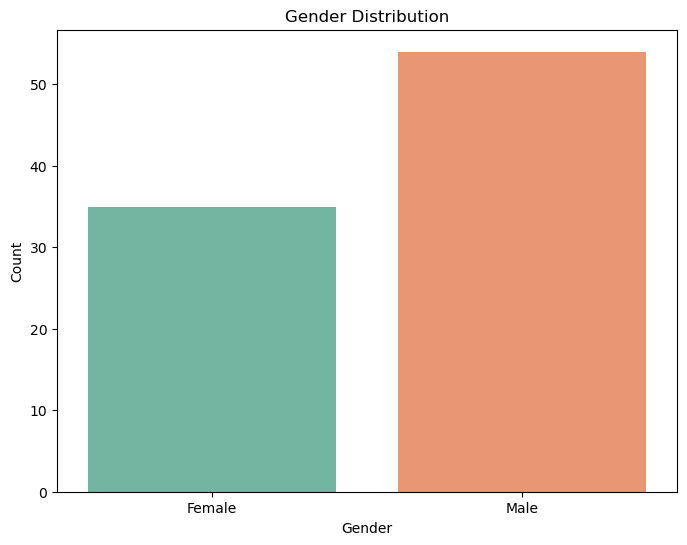

In [129]:
#Bar Chart for Gender Distribution

import matplotlib.pyplot as plt
import seaborn as sns

# Gender distribution bar chart
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', data=df, palette='Set2')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


#### Interpretation:

The gender distribution shows the survey respondents had more males than females, male respondents acounting for about 50% of the respondents

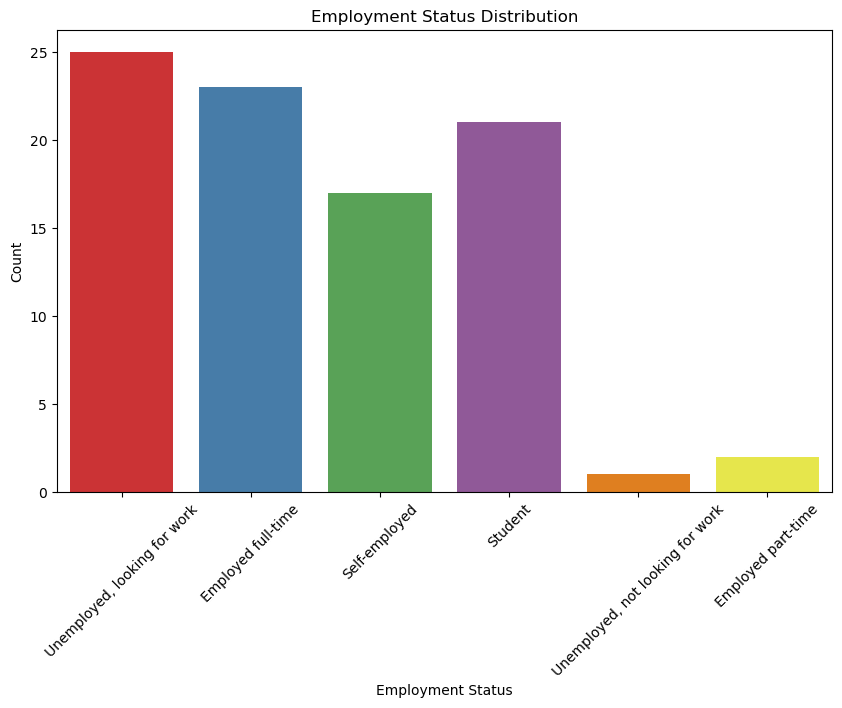

In [130]:
# Bar Chart Employment Distribution

# Employment status distribution bar chart
plt.figure(figsize=(10, 6))
sns.countplot(x='employment_status', data=df, palette='Set1')
plt.title('Employment Status Distribution')
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


#### Interpretation:

The chart indicates that majority of the survey respondents are job searching. Closely followed by those who already have full-time jobs, while those w with part-time employment, and respondents who are unemployed yet not job searching are the minority group

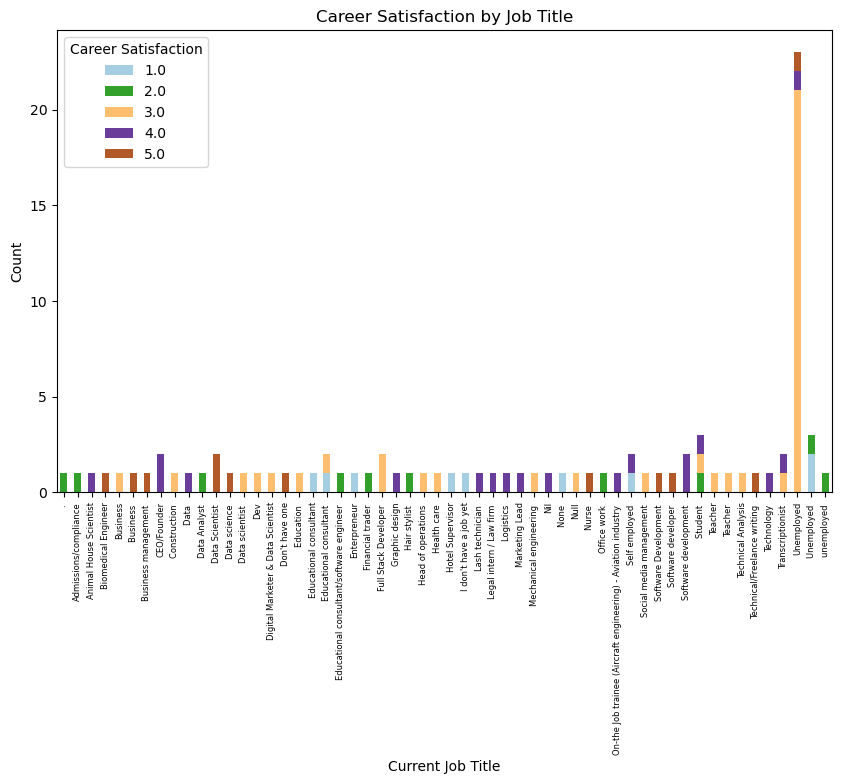

In [485]:
# Stacked Bar Chart for Career Satisfaction Across Different Job Titles
# Group data by job title and career satisfaction
job_satisfaction = df.groupby(['current_job_title', 'career_satisfaction']).size().unstack()

# Stacked bar chart
job_satisfaction.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Paired')
plt.title('Career Satisfaction by Job Title')
plt.xlabel('Current Job Title')
plt.ylabel('Count')
plt.xticks(rotation=90, fontsize=6)
plt.legend(title='Career Satisfaction')
plt.show()


#### Interpretation:

What is immediately discernable from this visualization is that there are way too many unique job titles, which can make encoding tricky. As such, consolidating similar job titles into broader categories would be a logical next step. 

Interestingly, respondents who identified as 'unemployed' show the highest career satisfaction scores and account for the majority group as well. This could indicate that despite their job-seeking status, they are satisfied with their previous experiences or feel secure in their skills / qualifications, giving them confidence in their future prospects.


C:\Users\Ummhabibi\AppData\Local\Temp\ipykernel_15424\162437721.py:28: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()  # Attempt to fit the layout


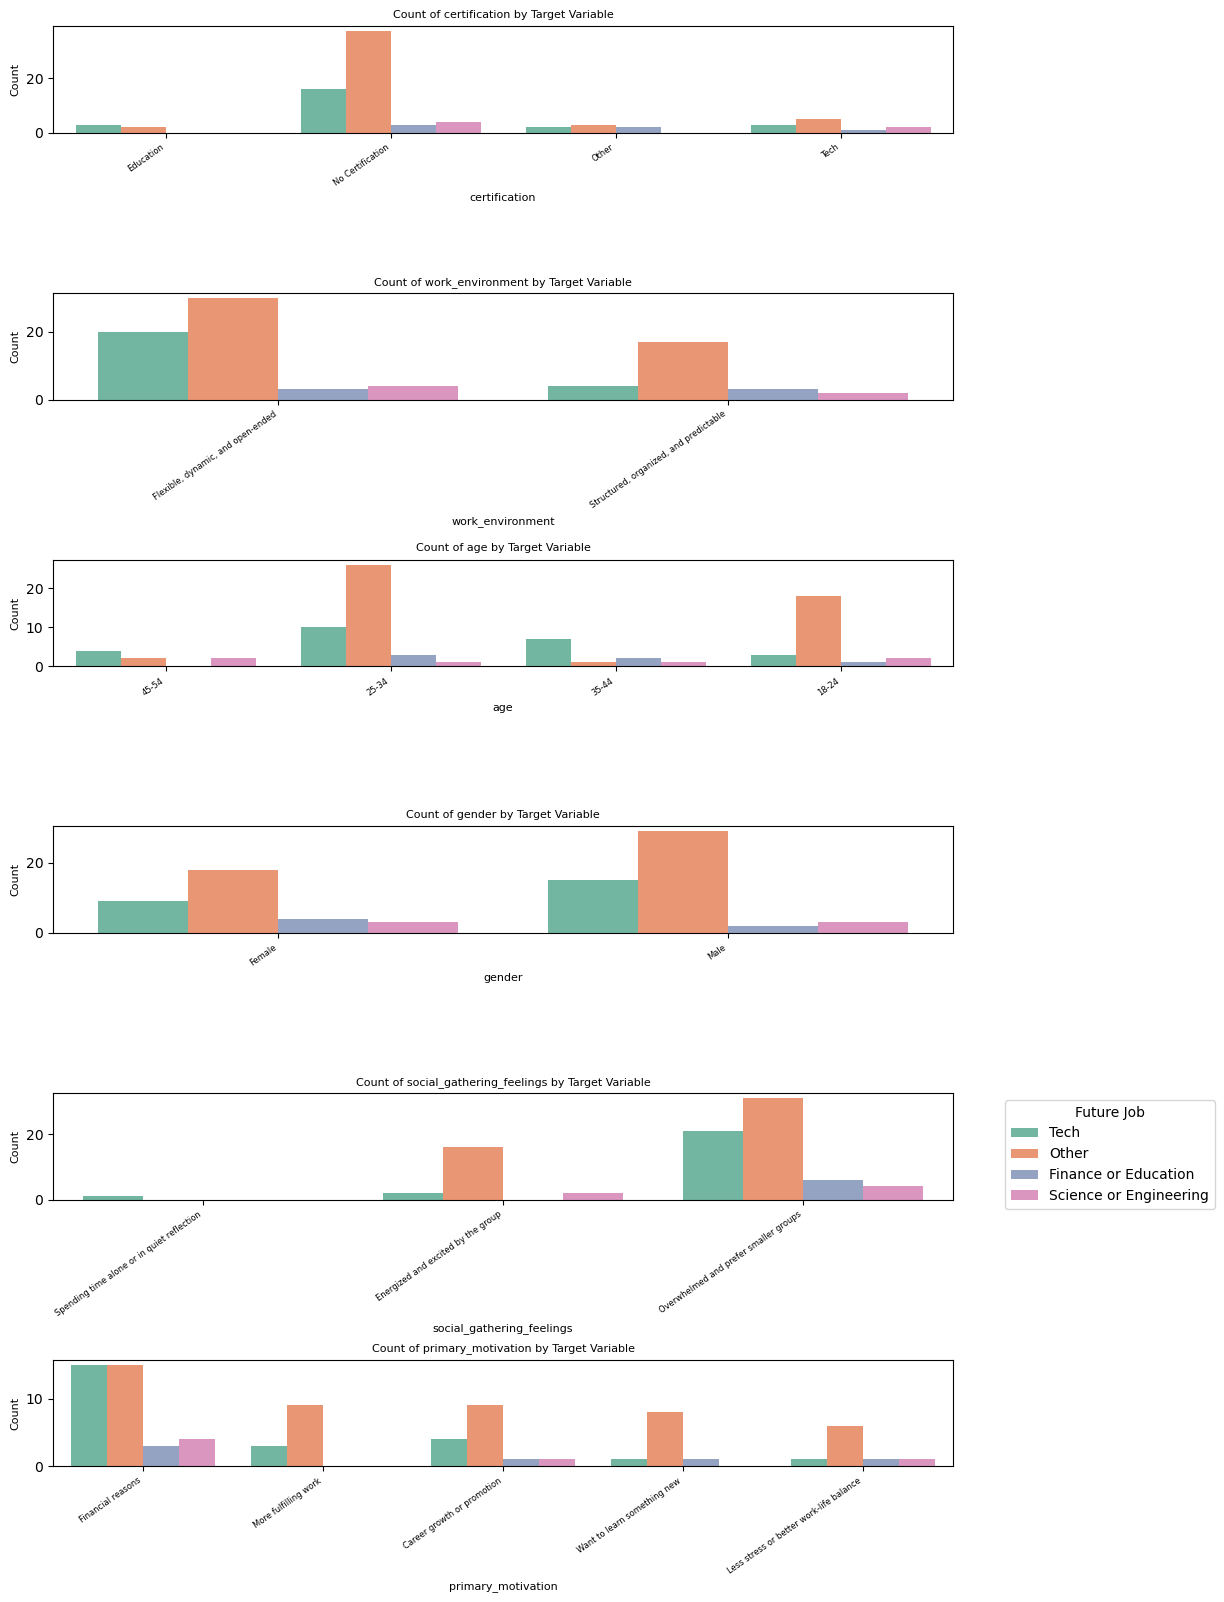

In [655]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example categorical features
categorical_features = ['certification', 'work_environment', 'age', 'gender', 
                        'social_gathering_feelings', 'primary_motivation']  
num_features = len(categorical_features)

# Increase figure size
plt.figure(figsize=(12, 18))  # Increase height to allow more room for subplots

for i, feature in enumerate(categorical_features):
    plt.subplot(num_features, 1, i + 1)  # Create a subplot for each feature
    sns.countplot(data=df, x=feature, hue='future_job', palette='Set2')
    plt.title(f'Count of {feature} by Target Variable', fontsize=8)
    plt.xlabel(feature, fontsize=8)
    plt.ylabel('Count', fontsize=8)
    plt.xticks(rotation=35, fontsize=6, ha='right')  # Rotate x-axis labels and right-align them

    # Remove legend for all subplots except the last one
    if i < num_features - 1:
        plt.legend([],[], frameon=False)

# Add the legend only once, outside the last subplot
plt.legend(title='Future Job', bbox_to_anchor=(1.05, 3.5), loc='upper left')

# Manually adjust space to fix overlap issues
plt.tight_layout()  # Attempt to fit the layout
plt.subplots_adjust(left=0.1, right=0.85, top=0.9, bottom=0.1, hspace=1.5)  # Increase hspace

plt.show()

#### Interpretation:

The subplot visualization shows the relationship between the target and some features. For example, it is seen that majority of respondents whose future job is in Finance, Tech, and other are overwhelmed by social gatherings and prefer smaller groups. 

This is may be indicative of an introverted personality type. Individual personality type is an important feature to consider when deciding on  a career path 

## **Feature Engineering**

To streamline the dataset and enhance model performance, several columns will be consolidated into broader features.

For example, soft skills and technical skills columns will be merged to create the skills feature; free time activity, recharge preference, social gathering feeling, and conversational style; all of which describe personality, will be merged to create the personality_type feature.

In [203]:
df.head(1)

,gender,employment_status,years_experience,education_level,age,transition_reason,transition_career,transition_challenge,current_job_title,career_satisfaction,primary_motivation,aspired_job,technical_skills,soft_skills,has_certifications,certification,free_time_activity,recharge_preference,social_gathering_feelings,conversation_style,work_environment,work_style,uncertainty_handling,work_life_balance
0,Female,"Unemployed, looking for work",4-7 years,Professional certifications,45-54,Seeking higher income or more security,IT,Opportunity Challenge,Other,3.0,Financial reasons,Finance,Other,Problem Solving,Yes,Education,Spending time alone or in quiet reflection,Unknown,Spending time alone or in quiet reflection,I mostly listen and speak when necessary,"Flexible, dynamic, and open-ended","Independent, solo work",I adapt quickly and enjoy new challenges,Balanced between work and personal time


In [656]:
#Step 1: streamline columns with too many unique values by consolidating into broader categories
df['technical_skills'].unique()

array(['Other', 'Sales', 'No Skills', 'Sales, Design (graphic, UX/UI)',
       'Marketing, Sales',
       'Programming (Python, Java, etc.), Data analysis, Marketing, Sales, Design (graphic, UX/UI)',
       'Data analysis, Marketing, Sales', 'Data analysis, Sales, Finance',
       'Programming (Python, Java, etc.), Data analysis',
       'Programming (Python, Java, etc.), Data analysis, Marketing, Sales, Design (graphic, UX/UI), Other',
       'Programming (Python, Java, etc.), Data analysis, Finance',
       'Data analysis', 'Finance',
       'Programming (Python, Java, etc.), Finance',
       'Programming (Python, Java, etc.), Data analysis, Sales, Finance',
       'Programming (Python, Java, etc.)',
       'Programming (Python, Java, etc.), Other',
       'Programming (Python, Java, etc.), Design (graphic, UX/UI), Other',
       'Programming (Python, Java, etc.), Data analysis, Design (graphic, UX/UI)',
       'Programming (Python, Java, etc.), Marketing', 'Marketing',
       'Sales

In [657]:
#Map technical skills into broader categories
tech_skill_map = {
    'Other': 'Other',
    'Sales': 'Finance',
    'No Skills': 'No Skills',
    'Sales, Design (graphic, UX/UI)': 'Tech',
    'Marketing, Sales': 'Finance',
    'Programming (Python, Java, etc.), Data analysis, Marketing, Sales, Design (graphic, UX/UI)': 'Tech',
    'Data analysis, Marketing, Sales': 'Finance',
    'Data analysis, Sales, Finance': 'Finance',
    'Programming (Python, Java, etc.), Data analysis': 'Tech',
    'Programming (Python, Java, etc.), Data analysis, Marketing, Sales, Design (graphic, UX/UI), Other': 'Tech',
    'Programming (Python, Java, etc.), Data analysis, Finance': 'Tech',
    'Data analysis': 'Tech',
    'Finance': 'Finance' ,
    'Programming (Python, Java, etc.), Finance': 'Tech',
    'Programming (Python, Java, etc.), Data analysis, Sales, Finance': 'Finance',
    'Programming (Python, Java, etc.)': 'Tech',
    'Programming (Python, Java, etc.), Other': 'Tech',
    'Programming (Python, Java, etc.), Design (graphic, UX/UI), Other': 'Tech',
    'Programming (Python, Java, etc.), Data analysis, Design (graphic, UX/UI)': 'Tech',
    'Programming (Python, Java, etc.), Marketing': 'Tech',
    'Marketing': 'Finance',
    'Sales, Design (graphic, UX/UI), Other': 'Finance',
    'Programming (Python, Java, etc.), Data analysis, Design (graphic, UX/UI), Finance': 'Tech',
    'Programming (Python, Java, etc.), Data analysis, Marketing, Design (graphic, UX/UI), Other': 'Tech',
    'Programming (Python, Java, etc.), Design (graphic, UX/UI)': 'Design',
    'Data analysis, Marketing, Sales, Design (graphic, UX/UI)': 'Tech',
    'Programming (Python, Java, etc.), Marketing, Finance': 'Finance',
    'Design (graphic, UX/UI)': 'Tech'
}

df['technical_skills'] = df['technical_skills'].replace(tech_skill_map)

In [658]:
df['technical_skills'].unique()

array(['Other', 'Finance', 'No Skills', 'Tech', 'Design'], dtype=object)

In [194]:
df['soft_skills'].unique()

array(['Problem solving, Time management',
       'Communication, Teamwork, Problem solving, Time management',
       'No Skills', 'Leadership, Time management',
       'Communication, Teamwork, Time management',
       'Leadership, Problem solving', 'Communication, Problem solving',
       'Communication, Teamwork, Leadership, Problem solving',
       'Communication',
       'Communication, Teamwork, Leadership, Problem solving, Time management',
       'Communication, Teamwork, Leadership', 'Communication, Teamwork',
       'Communication, Teamwork, Leadership, Time management',
       'Problem solving', 'Teamwork', 'Communication, Time management',
       'Communication, Leadership, Problem solving, Time management',
       'Communication, Teamwork, Problem solving',
       'Communication, Leadership, Problem solving',
       'Teamwork, Leadership, Problem solving, Time management',
       'Communication, Teamwork, Leadership, Problem solving, ',
       'Teamwork, Time management',


In [659]:
#Map technical skills into broader categories
sk_map = {
    'Problem solving, Time management': 'Problem Solving',
    'Communication, Teamwork, Problem solving, Time management': 'Communication',
    'No Skills': 'No Skills',
    'Leadership, Time management': 'Time management',
    'Communication, Teamwork, Time management': 'Teamwork',
    'Leadership, Problem solving': 'Leadership',
    'Communication, Problem solving': 'Communication',
    'Communication, Teamwork, Leadership, Problem solving': 'Communication',
    'Communication': 'Communication',
    'Communication, Teamwork, Leadership, Problem solving, Time management': 'Communication',
    'Communication, Teamwork, Leadership':'Communication',
    'Communication, Teamwork': 'Communication',
    'Communication, Teamwork, Leadership, Time management': 'Communication',
    'Problem solving': 'Problem solving',
    'Teamwork': 'Teamwork',
    'Communication, Time management': 'Time management',
    'Communication, Leadership, Problem solving, Time management': 'Leadership',
    'Communication, Teamwork, Problem solving': 'Leadership',
    'Communication, Leadership, Problem solving': 'Leadership',
    'Teamwork, Leadership, Problem solving, Time management': 'Teamwork',
    'Communication, Teamwork, Leadership, Problem solving, ': 'Communication',
    'Teamwork, Time management': 'Teamwork',
    'Teamwork, Problem solving, Time management': 'Teamwork',
    'Leadership': 'Leadership',
    'Teamwork, Problem solving': 'Teamwork'
}

df['soft_skills'] = df['soft_skills'].replace(sk_map)
df['soft_skills'].unique()

array(['Problem Solving', 'Communication', 'No Skills', 'Time management',
       'Teamwork', 'Leadership', 'Problem solving'], dtype=object)

In [660]:
#soft_skills 2.0
s_map= {'Problem Solving': 'Problem Solving', 'Communication': 'Communication', 'No Skills': 'No Skills',
        'Time Management': 'Problem Solving', 'Teamwork': 'Communication', 'Leadership': 'Leadership',
        'Problem solving': 'Problem Solving'}
df['soft_skills'] = df['soft_skills'].replace(s_map)
df['soft_skills'].unique()

array(['Problem Solving', 'Communication', 'No Skills', 'Time management',
       'Leadership'], dtype=object)

In [199]:
df['current_job_title'].unique()

array(['Transcriptionist ', 'Education ', 'Unemployed',
       'Animal House Scientist', 'Hair stylist ',
       'Mechanical engineering ', 'Financial trader ',
       'Digital Marketer & Data Scientist', 'Legal intern / Law firm ',
       'Office work ', 'Teacher', 'Business management ', 'Teacher ',
       'Data ', 'Student ', 'Biomedical Engineer', 'unemployed ',
       'Construction ', 'Data Scientist ', 'Business', 'Unemployed ',
       'Enterpreneur', 'Full Stack Developer ', 'Null', 'CEO/Founder',
       'Technical/Freelance writing ', 'Logistics ',
       'On-the Job trainee (Aircraft engineering) - Aviation industry ',
       'Business ', 'Software development ', 'None ', 'Nil',
       'Technical Analysis', 'Hotel Supervisor', 'Health care ',
       'Head of operations ', 'Educational consultant ',
       'Educational consultant', 'Social media management ',
       'Educational consultant/software engineer ', 'Data science ',
       'Data Analyst ', 'Data scientist ', 'Self em

In [661]:
#Map current_job_title into broader categories
cur_map = {
    'Transcriptionist ': 'Admin',
    'Education ': 'Teacher',
    'Unemployed': 'Unemployed',
    'Animal House Scientist': 'Scientist',
    'Hair stylist ': 'Beautician',
    'Mechanical engineering ': 'Engineer',
    'Financial trader ': 'Finance',
    'Digital Marketer & Data Scientist': 'Data Scientist',
    'Legal intern / Law firm ': 'Intern',
    'Office work ':'Admin',
    'Teacher': 'Teacher',
    'Business management ': 'Manager',
    'Teacher ': 'Teacher',
    'Data ': 'Data Scientist',
    'Student ': 'Unemployed',
    'Biomedical Engineer': 'Engineer',
    'unemployed ': 'Unemployed',
    'Construction ': 'Other',
    'Data Scientist ': 'Data Scientist',
    'Business': 'Finance',
    'Unemployed ': 'Unemployed',
    'Enterpreneur': 'Other',
    'Full Stack Developer ': 'Developer',
    'Null': 'Unemployed',
    'CEO/Founder': 'Other',
    'Technical/Freelance writing ': 'Other',
    'Logistics ': 'Other',
    'On-the Job trainee (Aircraft engineering) - Aviation industry ': 'Intern',
    'Business ': 'Finance',
    'Software development ': 'Developer',
    'None ': 'Unemployed',
    'Nil': 'Unemployed',
    'Technical Analysis': 'Other',
    'Hotel Supervisor': 'Manager',
    'Healthcare ': 'Medic',
    'Head of operations ': 'Manager',
    'Educational consultant ': 'Academic',
    'Educational consultant': 'Academic',
    'Social media management ': 'Manager',
    'Educational consultant/software engineer ': 'Developer',
    'Data science ': 'Data Scientist',
    'Data Analyst ': 'Data Scientist',
    'Data scientist ': 'Data Scientist',
    'Self employed ': 'Other',
    'Marketing Lead': 'Finance',
    'Software developer ': 'Developer',
    'Software Development ': 'Developer',
    'Dev': 'Developer',
    'Technology ': 'Developer',
    "Don't have one": 'Unemployed',
    'Nurse ': 'Medic',
    'Lash technician ': 'Beautician',
    'Graphic design': 'Other',
    "I don't have a job yet": 'Unemployed',
    '. ': 'Unemployed',
    'Admissions/compliance': 'Other'
}

#Mapping library to column
df['current_job_title'] = df['current_job_title'].replace(cur_map)

df['current_job_title'].unique()


array(['Admin', 'Teacher', 'Unemployed', 'Scientist', 'Beautician',
       'Engineer', 'Finance', 'Data Scientist', 'Intern', 'Manager',
       'Other', 'Developer', 'Health care ', 'Academic', 'Medic'],
      dtype=object)

In [662]:
curr_map = {
    'Admin': 'Other', 'Teacher': 'Academic' , 'Unemployed': 'Unemployed', 'Scientist': 'Scientist',
    'Beautician': 'Other', 'Engineer': 'Engineer', 'Finance': 'Finance' , 'Data Scientist':'Data Scientist', 'Intern': 'Other',
    'Manager': 'Manager', 'Other': 'Other', 'Developer': 'Developer', 'Health care ': 'Medic', 'Academic': 'Academic', 'Medic': 'Medic'
}

#Mapping library to current_job_title column
df['current_job_title'] = df['current_job_title'].replace(curr_map)

df['current_job_title'].unique()

array(['Other', 'Academic', 'Unemployed', 'Scientist', 'Engineer',
       'Finance', 'Data Scientist', 'Manager', 'Developer', 'Medic'],
      dtype=object)

In [218]:
df['work_environment'].unique()

array(['Flexible, dynamic, and open-ended',
       'Structured, organized, and predictable'], dtype=object)

In [663]:
#Streamline free time activity
fta = { 'Spending time alone or in quiet reflection': 'Spending time alone or with one or two close friends',
       'Socializing with friends or attending events': 'Socializing with friends or attending events',
       'Spending time alone or with one or two close friends': 'Spending time alone or with one or two close friends'}

df['free_time_activity'] = df['free_time_activity'].replace(fta)
df['free_time_activity'].unique()

array(['Spending time alone or with one or two close friends',
       'Socializing with friends or attending events'], dtype=object)

In [664]:
# Map social_gathering_feelings to enable consolidation with other columns 
sgf = {'Spending time alone or in quiet reflection': 'Overwhelmed and prefer smaller groups',
       'Energized and excited by the group': 'Energized and excited by the group',
       'Overwhelmed and prefer smaller groups': 'Overwhelmed and prefer smaller groups'}

#Replace with mapped values
df['social_gathering_feelings'] = df['social_gathering_feelings'].replace(sgf)
df['social_gathering_feelings'].unique()

array(['Overwhelmed and prefer smaller groups',
       'Energized and excited by the group'], dtype=object)

In [667]:
# Merging Free Time Activity, Recharge Preference, Social Gathering Feelings, and Conversation Style into Personality_Type
df['personality_type'] = df.apply(lambda x: 'Introvert' if (
    x['free_time_activity'] == 'Spending time alone or with one or two close friends' 
    and x['recharge_preference'] == 'Spending time alone or in quiet reflection' 
    and x['social_gathering_feelings'] in ['Overwhelmed and prefer smaller groups'] 
    and x['conversation_style'] == 'I mostly listen and speak when necessary')  
    else 'Extrovert', axis=1)

df['personality_type'].head()

0    Extrovert
1    Extrovert
2    Introvert
3    Extrovert
4    Introvert
Name: personality_type, dtype: object

In [669]:
# Drop redundant columns 
df = df.drop(columns=['free_time_activity', 'recharge_preference', 'conversation_style', 'social_gathering_feelings'])
df.head(1)

,gender,employment_status,work_experience,education_level,age,transition_reason,future_job,transition_challenge,current_job_title,career_satisfaction,primary_motivation,technical_skills,soft_skills,has_certifications,certification,work_environment,work_style,uncertainty_handling,work_life_balance,personality_type
0,Female,"Unemployed, looking for work",4-7 years,Professional certifications,45-54,Seeking higher income or more security,Tech,Opportunity Challenge,Other,3.0,Financial reasons,Other,Problem Solving,Yes,Education,"Flexible, dynamic, and open-ended","Independent, solo work",I adapt quickly and enjoy new challenges,Balanced between work and personal time,Extrovert


In [497]:
df['soft_skills'].unique()

array(['Problem Solving', 'Communication', 'No Skills', 'Time Management',
       'Teamwork', 'Leadership', 'Time management'], dtype=object)

In [670]:
#create new column Work Mode by merging 3 columns, work_environment, work_style, uncertainty_handling 
df['work_mode'] = df.apply(
    lambda row: 'Flexible' if (row['work_environment'] == 'Flexible, dynamic, and open-ended' and 
                               row['work_style'] == 'Team settings with collaboration' and 
                               row['uncertainty_handling'] == 'I adapt quickly and enjoy new challenges')
               else 'Structured' if (row['work_environment'] == 'Structured, organized, and predictable' and 
                                     row['work_style'] == 'Independent, solo work' and 
                                     row['uncertainty_handling'] == 'I prefer consistency and structure')
               else 'Other', axis=1)

In [671]:
df = df.drop(columns=['work_environment', 'work_style', 'uncertainty_handling'])
df.head(1)

,gender,employment_status,work_experience,education_level,age,transition_reason,future_job,transition_challenge,current_job_title,career_satisfaction,primary_motivation,technical_skills,soft_skills,has_certifications,certification,work_life_balance,personality_type,work_mode
0,Female,"Unemployed, looking for work",4-7 years,Professional certifications,45-54,Seeking higher income or more security,Tech,Opportunity Challenge,Other,3.0,Financial reasons,Other,Problem Solving,Yes,Education,Balanced between work and personal time,Extrovert,Other


In [672]:
#Create new column, Skills

# Define a function to concatenate technical and soft skills
def merge_skills(row):
    if row['technical_skills'] == 'No Skill' and row['soft_skills'] == 'No Skills':
        return 'No skills listed'
    elif row['technical_skills'] == 'No Skill':
        return row['soft_skills']
    elif row['soft_skills'] == 'No Skills':
        return row['technical_skills']
    elif row['technical_skills'] == 'Other':
        return row['soft_skills']  # Just return the soft skill if tech skill is 'Other'    
    else:
        return row['technical_skills'] + " and " + row['soft_skills']

# Apply function to create new 'skills' column
df['skills'] = df.apply(merge_skills, axis=1)


In [673]:
#Drop redundant columns
df = df.drop(columns=['technical_skills', 'soft_skills'])

#Display updated DataFrame
df.head(1)

,gender,employment_status,work_experience,education_level,age,transition_reason,future_job,transition_challenge,current_job_title,career_satisfaction,primary_motivation,has_certifications,certification,work_life_balance,personality_type,work_mode,skills
0,Female,"Unemployed, looking for work",4-7 years,Professional certifications,45-54,Seeking higher income or more security,Tech,Opportunity Challenge,Other,3.0,Financial reasons,Yes,Education,Balanced between work and personal time,Extrovert,Other,Problem Solving


In [675]:
df['skills'].value_counts()

skills
Tech and Communication       35
Finance and Communication    18
No Skills                     8
Tech and Leadership           6
Communication                 6
Problem Solving               3
Leadership                    2
Time management               1
Tech and Time management      1
Finance and Leadership        1
Design and Leadership         1
Tech and Problem Solving      1
Name: count, dtype: int64

In [676]:
#Map Skill column to reduce encoding complexity
df['skills'] = df['skills'].map({
    'Tech and Communication': 'Tech and Communication',       
    'Finance and Communication': 'Finance and Communication', 
    'No Skills': 'No Skills',                     
    'Tech and Leadership': 'Tech and Leadership',           
    'Communication': 'Leadership',               
    'Problem Solving': 'Time management',               
    'Leadership': 'Leadership',                  
    'Time management': 'Problem Solving',                
    'Tech and Time management': 'Tech and Leadership',      
    'Finance and Leadership': 'Tech and Leadership',       
    'Design and Leadership': 'Tech and Leadership',         
    'Tech and Problem Solving': 'Tech and Leadership'})     

In [677]:
df['skills'].unique()

array(['Time management', 'Finance and Communication', 'No Skills',
       'Problem Solving', 'Tech and Leadership', 'Tech and Communication',
       'Leadership'], dtype=object)

In [678]:
#Create new Transition Profile column
# Function to create Transition Profile
def create_transition_profile(row):
    if row['primary_motivation'] == 'Financial reasons' and row['work_life_balance'] == 'Prioritize work with minimal personal time':
        return 'Financial Balance'
    elif row['primary_motivation'] == 'More fulfilling work' and row['work_life_balance'] == 'Prioritize personal time over work':
        return 'Fulfillment Priority'
    elif row['primary_motivation'] == 'Career growth or promotion' and row['work_life_balance'] == 'Prioritize work with minimal personal time':
        return 'Financial Balance'
    elif row['primary_motivation'] == 'Want to learn something new' and row['work_life_balance'] == 'Balanced between work and personal time':
        return 'Fulfillment Priority'
    elif row['primary_motivation'] == 'Less stress or better work-life balance' and row['work_life_balance'] == 'Prioritize personal time over work':
        return 'Fulfillment Priority'
    else:
        return 'Other'  

# Applying the function to create the Transition Profile column
df['transition_profile'] = df.apply(create_transition_profile, axis=1)


In [679]:
#Drop redundant columns
df = df.drop(columns=['primary_motivation', 'transition_reason', 'work_life_balance', 'transition_challenge'])

#Display updated DataFrame
df.head(1)

,gender,employment_status,work_experience,education_level,age,future_job,current_job_title,career_satisfaction,has_certifications,certification,personality_type,work_mode,skills,transition_profile
0,Female,"Unemployed, looking for work",4-7 years,Professional certifications,45-54,Tech,Other,3.0,Yes,Education,Extrovert,Other,Time management,Other


#### Encoding Features

In [680]:
df['age'] = df['age'].map({'45-54':3, '25-34':1, '35-44':2, '18-24':0})

In [681]:
df['work_experience']= df['work_experience'].map({'4-7 years':2, '1-3 years': 1, '10+ years': 4, 'Less than 1 year': 0,
       '8-10 years': 3})

In [682]:
df['education_level'] = df['education_level'].map({'Professional certifications': 1, 'Master’s degree': 2,
       'Bachelor’s degree': 1, 'High school diploma': 0})

In [683]:
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})

In [684]:
df['employment_status'] = df['employment_status'].map({'Unemployed, looking for work': 0, 'Employed full-time': 1,
       'Self-employed': 1, 'Student': 0, 'Unemployed, not looking for work': 0,
       'Employed part-time': 1})

In [685]:
#Display updated DataFrame
df.head(1)

,gender,employment_status,work_experience,education_level,age,future_job,current_job_title,career_satisfaction,has_certifications,certification,personality_type,work_mode,skills,transition_profile
0,1,0,2,1,3,Tech,Other,3.0,Yes,Education,Extrovert,Other,Time management,Other


In [687]:
#Use label encoder to encode 
from sklearn.preprocessing import LabelEncoder

#initialize the encoder
le = LabelEncoder()

#Encode transition_career
df['future_job'] = le.fit_transform(df['future_job'])

#Mapping for transition_career
map_t = dict(zip(le.classes_, le.transform(le.classes_)))
print("transition_career mapping:", map_t)

transition_career mapping: {'Finance or Education': 0, 'Other': 1, 'Science or Engineering': 2, 'Tech': 3}


In [688]:
#Encode remaing columns
df['current_job_title'] = le.fit_transform(df['current_job_title'])

df['has_certifications'] = le.fit_transform(df['has_certifications'])

df['certification'] = le.fit_transform(df['certification'])

df['personality_type'] = le.fit_transform(df['personality_type'])

df['work_mode'] = le.fit_transform(df['work_mode'])

df['transition_profile'] = le.fit_transform(df['transition_profile'])


In [689]:
df['skills'] = le.fit_transform(df['skills'])

#Mapping for skills
map_s = dict(zip(le.classes_, le.transform(le.classes_)))

In [690]:
print("skills mapping:", map_s)

skills mapping: {'Finance and Communication': 0, 'Leadership': 1, 'No Skills': 2, 'Problem Solving': 3, 'Tech and Communication': 4, 'Tech and Leadership': 5, 'Time management': 6}


In [694]:
#Display updated DataFrame
df.head()

,gender,employment_status,work_experience,education_level,age,future_job,current_job_title,career_satisfaction,has_certifications,certification,personality_type,work_mode,skills,transition_profile
0,1,0,2,1,3,3,7,3.0,1,0,0,1,6,2
1,1,1,1,2,1,1,0,3.0,0,1,0,0,0,2
2,1,0,4,2,2,0,9,3.0,0,1,1,0,2,2
3,1,1,2,1,1,1,8,4.0,1,2,0,1,3,2
4,0,1,4,2,3,1,9,3.0,0,1,1,0,2,2


### **Feature Analysis**

This step involves using a correlation matrix, visualized via Heatmap, to determine which features are more relevant based on their correlation with the target.

In [521]:
#Correlation calculation
#Import necessary libraries

import seaborn as sns
import matplotlib.pyplot as plt

In [695]:
#Calculate correlation
#layer one
corr_matrix = df.corr()

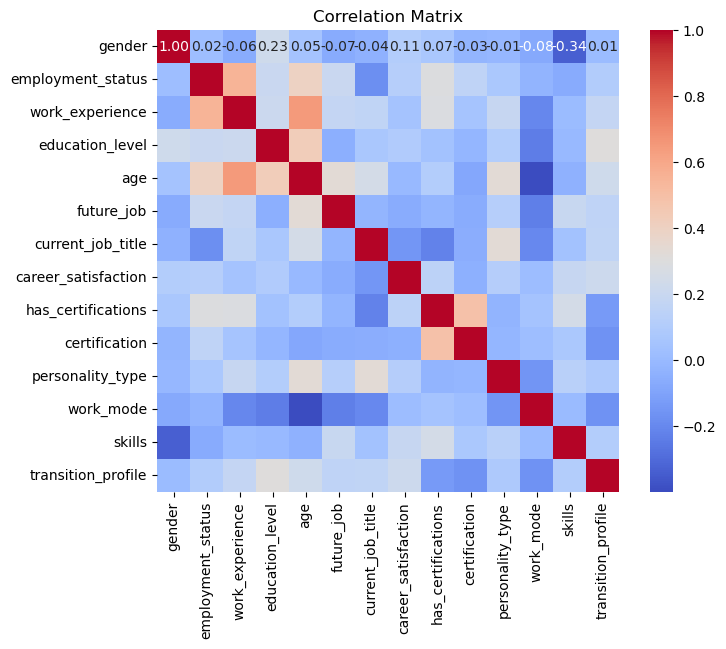

In [696]:
#Visualize with a Heatmap

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()
            

In [697]:
#Sort layer 1 correlation values with respect to target by absolute value in descending order
target_corr = corr_matrix['future_job'].abs().sort_values(ascending=False)

#Display sorted correlations
print(target_corr)

future_job             1.000000
age                    0.331206
work_mode              0.231087
employment_status      0.197351
skills                 0.193452
work_experience        0.177781
transition_profile     0.156962
personality_type       0.119158
gender                 0.066346
career_satisfaction    0.063727
certification          0.061832
education_level        0.050778
current_job_title      0.025057
has_certifications     0.023500
Name: future_job, dtype: float64


In [698]:
#Drop columns in both layers with correlation less than 0.1

#Identify columns with correlation < 0.1
col_drop = target_corr[target_corr < 0.1].index

In [699]:
#Display columns to drop from layer 1
print(col_drop)

Index(['gender', 'career_satisfaction', 'certification', 'education_level',
       'current_job_title', 'has_certifications'],
      dtype='object')


In [ ]:
#Drop columns from DataFrame
df = df.drop(columns=col_drop)

In [703]:
df.head(1)

,employment_status,work_experience,age,future_job,personality_type,work_mode,skills,transition_profile
0,0,2,3,3,0,1,6,2


## **Modeling**

#### Objective:

Build a predictive model to recommend career paths for two beginners and individuals aged 35+ transitioning careers where results are filter out for people transitioning based on work experience and transition profile

#### Algorithms: 

Logistic Regression was selected as the baseline model for multiclass classification, with plans to use Random Forest and Gradient Boosting for improved performance and robustness.

#### Data Splitting: 

The dataset will be divided into 80% training and 20% testing sets.

#### Cross-Validation: 

5-fold cross-validation will be employed to ensure model robustness, averaging the F1 macro score.

#### Model Training and Evaluation: 

The Logistic Regression model will be trained with a maximum of 1000 iterations. Performance was assessed using accuracy, precision, recall, F1 score, and a confusion matrix to evaluate prediction effectiveness. 

#### Results: 

Metrics will provide insight into model performance, guiding future enhancements.



In [704]:
#Step 1: Import necessary libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [705]:
#Step 2: Prepare data
X = df.drop(columns=['future_job'])  # Features
y = df['future_job']  # Target variable

In [706]:
#Step 3: Split data

#Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [711]:
#Step 4: Initialize and train model

model = LogisticRegression(max_iter=1000)

# Train model
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [712]:
#Step 5: Cross validation

cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1_macro')  # Macro F1 score
print(f"Cross-Validation F1 Scores: {cv_scores}")
print(f"Mean F1 Score: {cv_scores.mean()}")

C:\Users\Ummhabibi\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation F1 Scores: [0.32706767 0.31746032 0.44117647 0.56022409 0.32142857]
Mean F1 Score: 0.3934714236571821


In [713]:
#Trying 2 fold validation

cv_scores = cross_val_score(model, X_train, y_train, cv=2, scoring='f1_macro')  # Macro F1 score
print(f"Cross-Validation F1 Scores: {cv_scores}")
print(f"Mean F1 Score: {cv_scores.mean()}")

Cross-Validation F1 Scores: [0.21818182 0.3375    ]
Mean F1 Score: 0.2778409090909091


**Result Interpretation:**

F1 scores of both layers indicate poor model performance on training data. RandomForest and GradientBoosting Classifiers will be applied next to determine if model performance will improve

In [714]:
#Intialize RandomForest and GradientBoosting models

rf = RandomForestClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)


In [740]:
#Cross-validation
rf_scores = cross_val_score(rf, X_train, y_train, cv=2, scoring='accuracy')
gb_scores = cross_val_score(gb, X_train, y_train, cv=2, scoring='accuracy')

#Display results
print("Random Forest F1 Scores:", rf_scores)
print("GBoost F1 Scores:", gb_scores)


Random Forest F1 Scores: [0.48484848 0.66666667]
GBoost F1 Scores: [0.57575758 0.60606061]


In [741]:
# Fit the models
rf.fit(X_train, y_train)
gb.fit(X_train, y_train)


GradientBoostingClassifier(random_state=42)

In [742]:
#Test model 

y_pred_rf = rf.predict(X_test)
y_pred_gb = gb.predict(X_test)


In [743]:
# Generate classification reports
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))



Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.50      0.67      0.57         9
           3       0.20      0.25      0.22         4

    accuracy                           0.41        17
   macro avg       0.23      0.31      0.26        17
weighted avg       0.31      0.41      0.35        17

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.50      0.56      0.53         9
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         4

    accuracy                           0.29        17
   macro avg       0.12      0.14      0.13        17
weighted avg       0.26      0.29      0.28        17



C:\Users\Ummhabibi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ummhabibi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ummhabibi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ummhabibi\anaconda3

### Model Evaluation:

**Interpretation of Results:**

#### Random Forest:

Class 0: High precision (1.00) but lower recall (0.75), meaning it predicted all instances of class 0 correctly but missed one instance.

Class 1: Good balance between precision (0.88) and recall (0.78), but it didn’t capture every class 1 sample.

Class 3: Precision is lower (0.50), meaning the model made quite a few false positives, but the recall is high (0.75), capturing most instances of class 3.

#### Gradient Boosting:

Class 0 & 3: Both have high precision (1.00) and good F1-scores (0.86), though the recall for both is 0.75, meaning the model missed some instances.

Class 1: Perfect recall (1.00), which means all class 1 samples were predicted correctly, and its precision is quite high (0.82).

**Overall Model Comparison:**

Random Forest: Accuracy is 76%, but the performance for class 3 is weaker due to low precision.

Gradient Boosting: Higher accuracy (88%) and stronger performance across all classes, especially in precision and F1-scores, indicating a better balance and fewer misclassifications.

**Conclusion:**

Gradient Boosting is performing better overall based on higher accuracy (0.88), macro average, and weighted average F1-scores.
Random Forest struggles a bit with class 3 predictions, making it less balanced across classes.


**Next Steps:**

Class 2 not appearing in the results likely indicates that there were no predictions or true instances for that class in the test set, which could be due to class imbalance or insufficient representation of class 2 in the training data.

Using SMOTE or RandomOverSampler (ROS) can help by creating more synthetic or oversampled instances of underrepresented classes, this could improve the model’s ability to detect and classify those classes; especially useful if class 2 has very few samples.



In [729]:
#Apply RandomOverSampler

#Import necessary libraries
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
import numpy as np

In [722]:
#Display class distribution 
y_train.value_counts()

future_job
1    38
3    20
2     6
0     2
Name: count, dtype: int64

In [744]:
# Define the desired distribution
sampling_strategy = {0: 20, 1: 38, 2: 20, 3: 20}

# Initialize RandomOverSampler 
ros = RandomOverSampler(sampling_strategy=sampling_strategy, random_state=42)

# Apply RandomOverSampler to only training data
X_res, y_res = ros.fit_resample(X_train, y_train)

# Check the new class distribution
print("Class distribution after RandomOverSampler:")
print(y_res.value_counts())


Class distribution after RandomOverSampler:
future_job
1    38
2    20
3    20
0    20
Name: count, dtype: int64


In [747]:
#Train classifiers on ROS data

# Initialize classifiers
rf_cl = RandomForestClassifier(random_state=42)
gb_cl = GradientBoostingClassifier(random_state=42)

# Train on resampled data
rf_cl.fit(X_res, y_res)
gb_cl.fit(X_res, y_res)



GradientBoostingClassifier(random_state=42)

In [748]:
#Test Classifiers

# Predict on test set
y_pred_rf = rf_cl.predict(X_test)
y_pred_gb = gb_cl.predict(X_test)

# Generate classification reports
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.50      0.67      0.57         9
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         4

    accuracy                           0.35        17
   macro avg       0.12      0.17      0.14        17
weighted avg       0.26      0.35      0.30        17

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.50      0.56      0.53         9
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         4

    accuracy                           0.29        17
   macro avg       0.12      0.14      0.13        17
weighted avg       0.26      0.29      0.28        17



C:\Users\Ummhabibi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ummhabibi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ummhabibi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ummhabibi\anaconda3\Lib\sit

In [737]:
#Train classifiers on ROS data

# Initialize classifiers
rf_cl = RandomForestClassifier(random_state=42)
gb_cl = GradientBoostingClassifier(random_state=42)

# Train on resampled data
rf_cl.fit(X_train_res, y_train_res)
gb_cl.fit(X_train_res, y_train_res)


GradientBoostingClassifier(random_state=42)

In [738]:
#Test Classifiers

# Predict on test set
y_pred_rfr = rf_cl.predict(X_test)
y_pred_gbr = gb_cl.predict(X_test)

# Generate classification reports
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rfr))

print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gbr))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.45      0.56      0.50         9
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         4

    accuracy                           0.29        17
   macro avg       0.11      0.14      0.12        17
weighted avg       0.24      0.29      0.26        17

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.50      0.44      0.47         9
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         4

    accuracy                           0.24        17
   macro avg       0.12      0.11      0.12        17
weighted avg       0.26      0.24      0.25        17



C:\Users\Ummhabibi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ummhabibi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ummhabibi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ummhabibi\anaconda3\Lib\sit

In [755]:
#Apply Stratified sampling for test set as a last ditch effort

# Stratified split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [756]:
# Apply RandomOverSampler to the training set only
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)


In [757]:
#Train classifiers on ROS data

# Initialize classifiers
rf_cl = RandomForestClassifier(random_state=42)
gb_cl = GradientBoostingClassifier(random_state=42)

# Train on resampled data
rf_cl.fit(X_resampled, y_resampled)
gb_cl.fit(X_resampled, y_resampled)


GradientBoostingClassifier(random_state=42)

In [758]:
#Test Classifiers

# Predict on test set
y_pred_rfr = rf_cl.predict(X_test)
y_pred_gbr = gb_cl.predict(X_test)

# Generate classification reports
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rfr))

print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gbr))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.71      0.50      0.59        10
           2       0.25      1.00      0.40         1
           3       0.33      0.20      0.25         5

    accuracy                           0.41        17
   macro avg       0.32      0.42      0.31        17
weighted avg       0.53      0.41      0.44        17

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.67      0.40      0.50        10
           2       0.25      1.00      0.40         1
           3       0.50      0.40      0.44         5

    accuracy                           0.41        17
   macro avg       0.35      0.45      0.34        17
weighted avg       0.55      0.41      0.45        17



In [762]:
#Trying other algorithms (XGB, KNN,SVM)
#Import necessary libraries
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Create a scaler instance
scaler = StandardScaler()

# Fit and transform the training data
X_resampled_scaled = scaler.fit_transform(X_resampled)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

# Initialize KNN with k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Use X_train_scaled and X_test_scaled for training and prediction
knn.fit(X_resampled_scaled, y_resampled)
y_predk = knn.predict(X_test_scaled)

# Evaluate the model
print(classification_report(y_test, y_predk))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.80      0.40      0.53        10
           2       0.33      1.00      0.50         1
           3       0.67      0.40      0.50         5

    accuracy                           0.41        17
   macro avg       0.45      0.45      0.38        17
weighted avg       0.69      0.41      0.49        17



In [764]:
from sklearn.svm import SVC

svm_model = SVC(random_state=42)
svm_model.fit(X_resampled, y_resampled)
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.57      0.40      0.47        10
           2       0.00      0.00      0.00         1
           3       0.33      0.40      0.36         5

    accuracy                           0.35        17
   macro avg       0.23      0.20      0.21        17
weighted avg       0.43      0.35      0.38        17



In [766]:
# Create DMatrix for XGBoost
dtrain = xgb.DMatrix(X_resampled, label=y_resampled)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set parameters
params = {
    'objective': 'multi:softmax',  # Specify multiclass classification
    'num_class': 4,  # Number of classes
    'eval_metric': 'mlogloss',  # Evaluation metric
    'max_depth': 3,  # Maximum depth of trees
    'eta': 0.1,  # Learning rate
    'seed': 42
}

# Train the model
model = xgb.train(params, dtrain, num_boost_round=100)
#Predict
y_pred = model.predict(dtest)
#Evaluate
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.57      0.40      0.47        10
           2       0.25      1.00      0.40         1
           3       0.33      0.20      0.25         5

    accuracy                           0.35        17
   macro avg       0.29      0.40      0.28        17
weighted avg       0.45      0.35      0.37        17



#### Results After Resampling:

The classification report indicates even after resampling the train set, the model's performance is not improved. 

Since the dataset size was small to begin with, augmenting the entire data set seems to be logical next step as more data cannot be gathered due to time constraint

In [767]:
# Resampling entire data set

ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X, y)

In [768]:
#Split resampled data
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [769]:
#Train classifiers on ROS data

# Initialize classifiers
rf_cl = RandomForestClassifier(random_state=42)
gb_cl = GradientBoostingClassifier(random_state=42)

# Train on resampled data
rf_cl.fit(X_train, y_train)
gb_cl.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [771]:
#Test Classifiers

# Predict on test set
y_pred_r = rf_cl.predict(X_test)
y_pred_g = gb_cl.predict(X_test)

# Generate classification reports
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_r))

print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_g))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      0.71      0.83         7
           2       0.85      1.00      0.92        11
           3       0.82      0.75      0.78        12

    accuracy                           0.87        38
   macro avg       0.89      0.87      0.87        38
weighted avg       0.87      0.87      0.86        38

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      0.57      0.73         7
           2       0.85      1.00      0.92        11
           3       0.75      0.75      0.75        12

    accuracy                           0.84        38
   macro avg       0.87      0.83      0.83        38
weighted avg       0.85      0.84      0.83        38



### Results:

 Given that this project also targets individuals looking to transition into new careers as well as beginners, ensuring high precision and recall across all classes is vital. The Random Forest model seems to provide a better balance for both.


In [772]:
#Save model to pickle
import pickle
with open('career_model.pkl', 'wb') as file:
    pickle.dump(rf_cl, file)